In [150]:
import pandas as pd
import numpy as np

In [151]:
df=pd.read_csv("iris.csv")

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [154]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [155]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [156]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [157]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [158]:
df.shape

(150, 5)

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

In [160]:
df.columns=df.columns.str.lower().str.strip()

In [161]:
x=df.drop("species",axis=1)
y=df["species"]

In [162]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y,test_size=0.2,random_state=42,stratify=y)

In [163]:
ytrain.shape

(120,)

In [164]:
lda=LDA(n_components=2)
xtrain_lda=lda.fit_transform(xtrain,ytrain)
xtest_lda=lda.transform(xtest)

In [165]:
y_pred=lda.predict(xtest)
print("LDA ACCURACY:",accuracy_score(ytest,y_pred))

LDA ACCURACY: 1.0


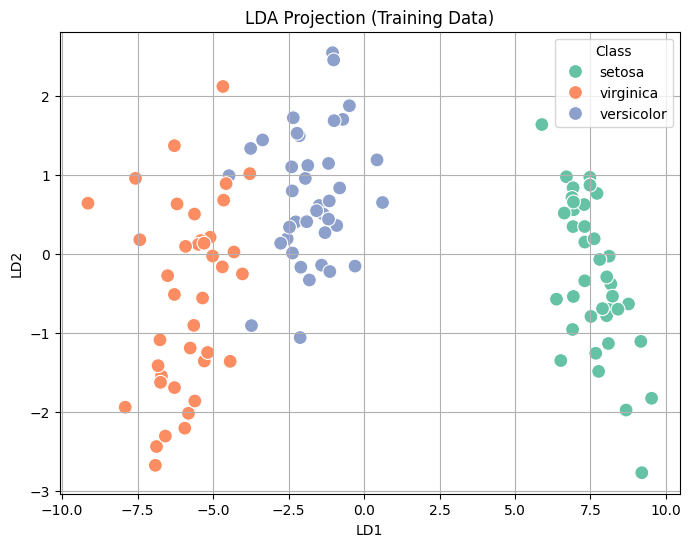

In [166]:
from matplotlib import pyplot as plt
import seaborn as sns
lda_df = pd.DataFrame(xtrain_lda, columns=['LD1', 'LD2'])
lda_df['Class'] = ytrain.values

plt.figure(figsize=(8,6))
sns.scatterplot(data=lda_df, x='LD1', y='LD2', hue='Class', palette='Set2', s=100)
plt.title('LDA Projection (Training Data)')
plt.grid(True)
plt.show()

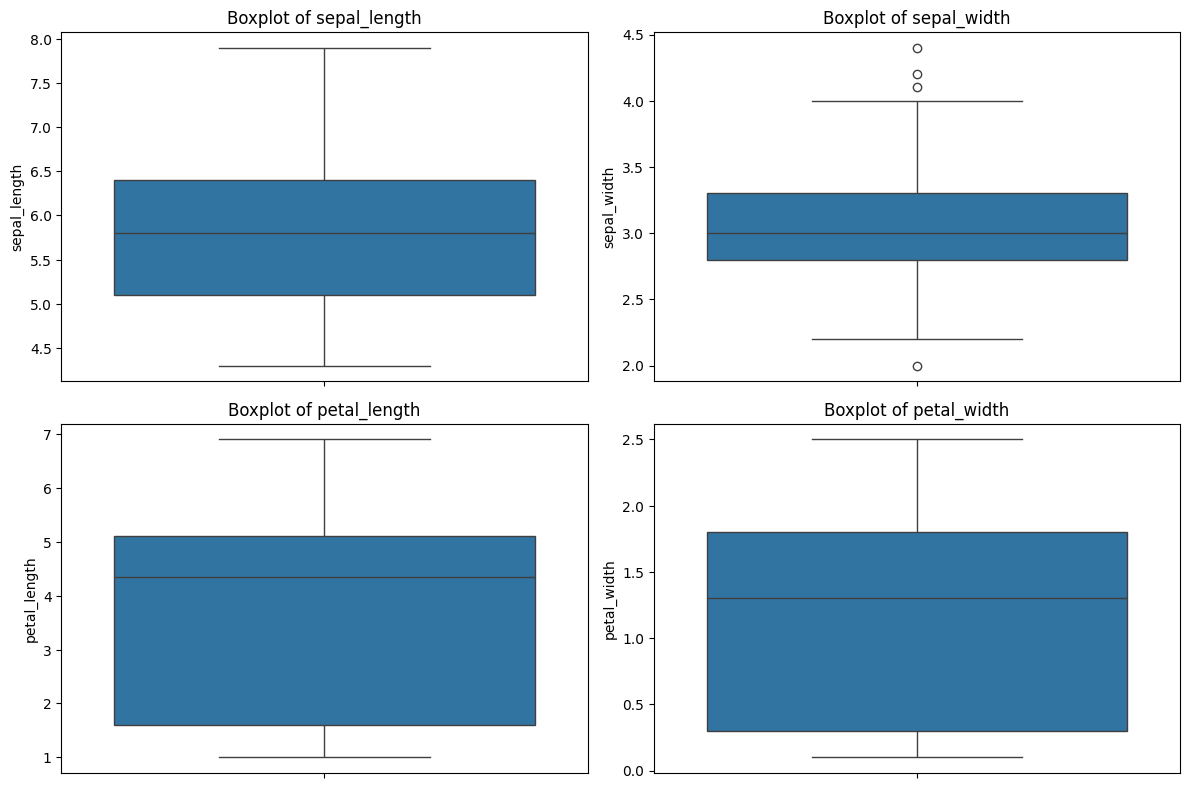

In [167]:

plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

In [168]:
q1=df["sepal_width"].quantile(0.25)
q3=df["sepal_width"].quantile(0.75)
iqr=q3-q1

lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
print("IQR:",iqr)
print("lower bound: ",lower_bound)
print("upper_bound: ",upper_bound)
sepal=df["sepal_width"]
outliers=[]
for i in sepal:
    if(i>upper_bound or i<lower_bound):
        outliers.append(i)
    
print("outliers are: ")
print(outliers)
outlier=df[(df["sepal_width"]>upper_bound) | (df["sepal_width"]<lower_bound)]
print("outliers row in sepal width")
print(outlier)

IQR: 0.5
lower bound:  2.05
upper_bound:  4.05
outliers are: 
[4.4, 4.1, 4.2, 2.0]
outliers row in sepal width
    sepal_length  sepal_width  petal_length  petal_width     species
15           5.7          4.4           1.5          0.4      setosa
32           5.2          4.1           1.5          0.1      setosa
33           5.5          4.2           1.4          0.2      setosa
60           5.0          2.0           3.5          1.0  versicolor


In [169]:
df_cleaned=df[(df["sepal_width"]>=lower_bound) & (df["sepal_width"]<=upper_bound)]

In [170]:
print("original shape:",df.shape)
print("shape after removing outliers: ",df_cleaned.shape)

original shape: (150, 5)
shape after removing outliers:  (146, 5)


In [171]:
x=df_cleaned.iloc[:,:-1]
y=df_cleaned.iloc[:,-1]
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [172]:
lda=LDA(n_components=2)
xtrain_lda=lda.fit_transform(xtrain,ytrain)
xtest_lda=lda.transform(xtest)
ypred=lda.predict(xtest)
print("accuracy score: ",accuracy_score(ytest,ypred))


accuracy score:  0.9666666666666667


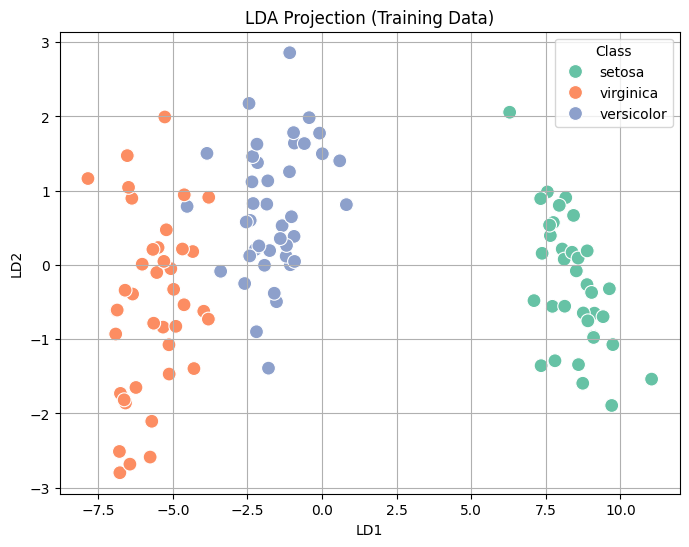

In [173]:
lda_df = pd.DataFrame(xtrain_lda, columns=['LD1', 'LD2'])
lda_df['Class'] = ytrain.values

plt.figure(figsize=(8,6))
sns.scatterplot(data=lda_df, x='LD1', y='LD2', hue='Class', palette='Set2', s=100)
plt.title('LDA Projection (Training Data)')
plt.grid(True)
plt.show()